In [48]:
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from gbm import estimate_parameters
from scipy.fftpack import idct

In [49]:
plt.style.use('seaborn')

/tmp/ipykernel_465529/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [50]:
gbm_parameters = [
        # {'mu': 0.0, 'sigma': 0.4},
        # {'mu': 0.0, 'sigma': 0.6},
        # {'mu': 0.0, 'sigma': 0.8},
        # {'mu': 0.0, 'sigma': 1.0},
        # {'mu': 0.1, 'sigma': 0.4},
        # {'mu': 0.1, 'sigma': 0.6},
        # {'mu': 0.1, 'sigma': 0.8},
        # {'mu': 0.1, 'sigma': 1.0},
        # {'mu': 0.3, 'sigma': 0.4},
        {'mu': 0.3, 'sigma': 0.6},
        # {'mu': 0.3, 'sigma': 0.8},
        # {'mu': 0.3, 'sigma': 1.0},
]

n_timesteps = 1000

prediction_length = 30

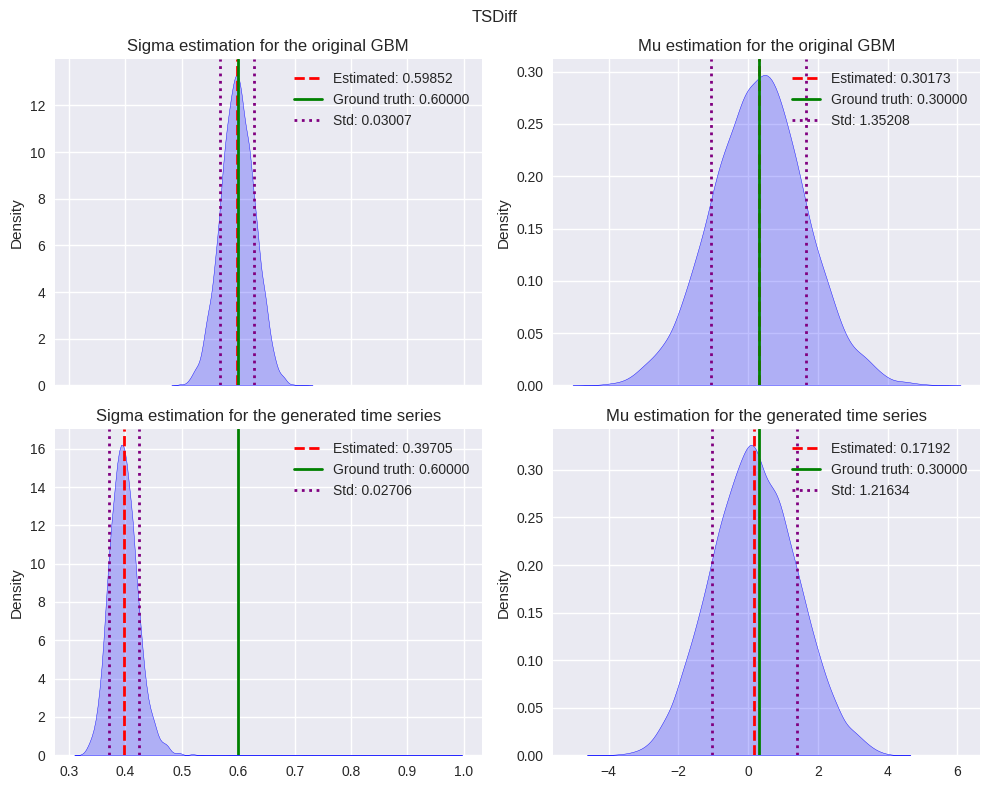

In [51]:
estimations = []
for EXP_NUMBER in range(1):
    gbm_path = f'../results/test1_cosine_transform/generation_log-{EXP_NUMBER}/'
    data_path = gbm_path
    real = np.load(data_path + 'real_samples.npy')
    synth = np.load(data_path + 'synth_samples.npy')

    scale = np.mean(
                np.abs(real[..., : -prediction_length]),
                axis=-1,
                keepdims=True,
            )
    scaled_real = real/scale


    fig, axs = plt.subplots(2, 2, tight_layout=True, sharex='col', figsize=(10, 8))
    fig.suptitle('TSDiff')

    # Ground truth
    sigma_gt = gbm_parameters[EXP_NUMBER-1]['sigma']
    mu_gt = gbm_parameters[EXP_NUMBER-1]['mu']

    # Estimation for the original GBM
    sigmas_real, mus_real = estimate_parameters(scaled_real.T, 1/1000, ret_distribution=True)
    estimated_sigma_real = np.mean(sigmas_real)
    estimated_mu_real = np.mean(mus_real)
    std_sigma_real = np.std(sigmas_real)
    std_mu_real = np.std(mus_real)


    sigmas_synth, mus_synth = estimate_parameters(synth.T, 1/1000, ret_distribution=True)
    estimated_sigma_synth = np.mean(sigmas_synth)
    estimated_mu_synth = np.mean(mus_synth)
    std_sigma_synth = np.std(sigmas_synth)
    std_mu_synth = np.std(mus_synth)

    estimations.append(
        {
            'mu_gt': mu_gt,
            'mu_est': estimated_mu_synth,
            'sigma_gt': sigma_gt,
            'sigma_est': estimated_sigma_synth
        }
    )

    sns.kdeplot(sigmas_real, ax=axs[0, 0], fill=True, color='blue')
    axs[0, 0].axvline(estimated_sigma_real, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_sigma_real:.5f}')
    axs[0, 0].axvline(sigma_gt, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {sigma_gt:.5f}')
    axs[0, 0].axvline(estimated_sigma_real + std_sigma_real, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_sigma_real:.5f}')
    axs[0, 0].axvline(estimated_sigma_real - std_sigma_real, color='purple', linestyle='dotted', linewidth=2)
    axs[0, 0].set_title('Sigma estimation for the original GBM')
    axs[0, 0].legend()

    sns.kdeplot(mus_real, ax=axs[0, 1], fill=True, color='blue')
    axs[0, 1].axvline(estimated_mu_real, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_mu_real:.5f}')
    axs[0, 1].axvline(mu_gt, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {mu_gt:.5f}')
    axs[0, 1].axvline(estimated_mu_real + std_mu_real, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_mu_real:.5f}')
    axs[0, 1].axvline(estimated_mu_real - std_mu_real, color='purple', linestyle='dotted', linewidth=2)
    axs[0, 1].set_title('Mu estimation for the original GBM')
    axs[0, 1].legend()

    sns.kdeplot(sigmas_synth, ax=axs[1, 0], fill=True, color='blue')
    axs[1, 0].axvline(estimated_sigma_synth, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_sigma_synth:.5f}')
    axs[1, 0].axvline(sigma_gt, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {sigma_gt:.5f}')
    axs[1, 0].axvline(estimated_sigma_synth + std_sigma_synth, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_sigma_synth:.5f}')
    axs[1, 0].axvline(estimated_sigma_synth - std_sigma_synth, color='purple', linestyle='dotted', linewidth=2)
    axs[1, 0].set_title('Sigma estimation for the generated time series')
    axs[1, 0].legend()

    sns.kdeplot(mus_synth, ax=axs[1, 1], fill=True, color='blue')
    axs[1, 1].axvline(estimated_mu_synth, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_mu_synth:.5f}')
    axs[1, 1].axvline(mu_gt, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {mu_gt:.5f}')
    axs[1, 1].axvline(estimated_mu_synth + std_mu_synth, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_mu_synth:.5f}')
    axs[1, 1].axvline(estimated_mu_synth - std_mu_synth, color='purple', linestyle='dotted', linewidth=2)
    axs[1, 1].set_title('Mu estimation for the generated time series')
    axs[1, 1].legend()

    # plt.savefig(f'plots/parameter_estimations_exp_{EXP_NUMBER}.png', bbox_inches='tight')
    plt.show()

In [52]:
import pandas as pd

In [53]:
df = pd.DataFrame(estimations)
df['abs_error_mu'] = abs(df['mu_gt'] - df['mu_est'])
df['abs_error_sigma'] = abs(df['sigma_gt'] - df['sigma_est'])
df.round(4)

,mu_gt,mu_est,sigma_gt,sigma_est,abs_error_mu,abs_error_sigma
0,0.3,0.1719,0.6,0.3971,0.1281,0.2029


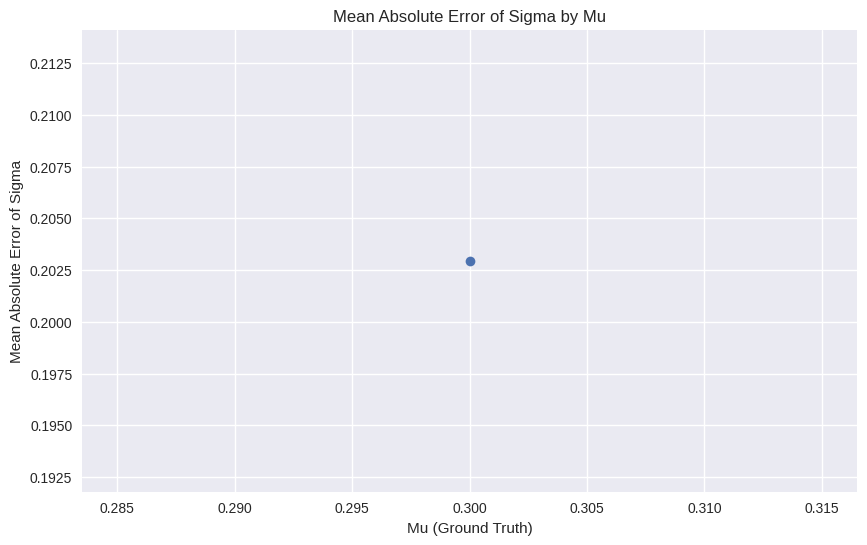

In [54]:
import matplotlib.pyplot as plt

# Calculate the mean absolute error for sigma grouped by different mu values
sigma_mae_by_mu = df.groupby('mu_gt')['abs_error_sigma'].mean()

# Plotting the MAE for sigma by different mu values
plt.figure(figsize=(10, 6))
plt.plot(sigma_mae_by_mu.index, sigma_mae_by_mu.values, marker='o', linestyle='-')
plt.title('Mean Absolute Error of Sigma by Mu')
plt.xlabel('Mu (Ground Truth)')
plt.ylabel('Mean Absolute Error of Sigma')
plt.grid(True)
plt.show()

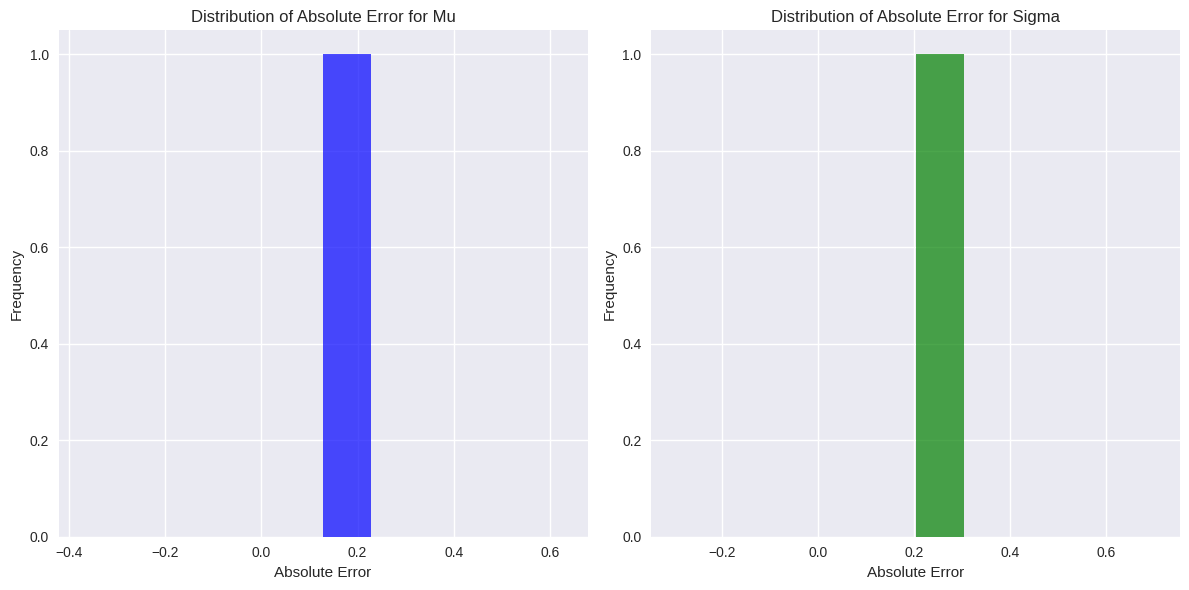

In [55]:
plt.figure(figsize=(12, 6))

# Histogram for abs_error_mu
plt.subplot(1, 2, 1)
plt.hist(df['abs_error_mu'], bins=10, alpha=0.7, color='blue')
plt.title('Distribution of Absolute Error for Mu')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')

# Histogram for abs_error_sigma
plt.subplot(1, 2, 2)
plt.hist(df['abs_error_sigma'], bins=10, alpha=0.7, color='green')
plt.title('Distribution of Absolute Error for Sigma')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


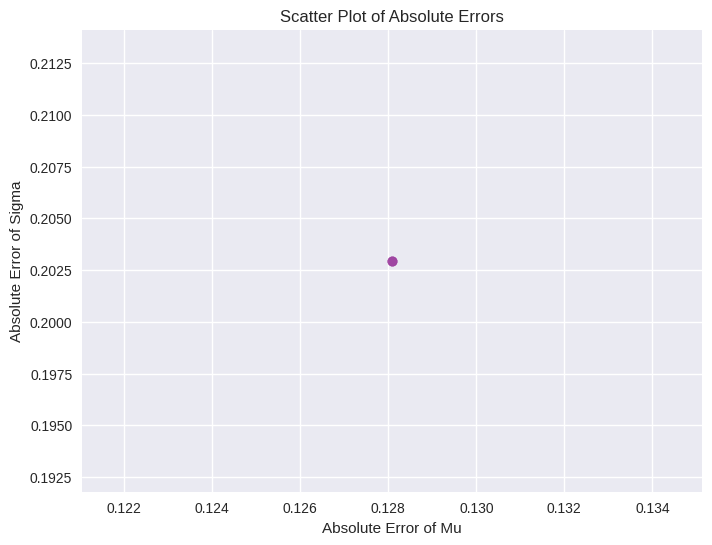

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(df['abs_error_mu'], df['abs_error_sigma'], alpha=0.7, color='purple')
plt.title('Scatter Plot of Absolute Errors')
plt.xlabel('Absolute Error of Mu')
plt.ylabel('Absolute Error of Sigma')
plt.grid(True)
plt.show()


In [57]:
# plt.figure(figsize=(12, 6))

# # Box plot for abs_error_mu by mu_gt
# plt.subplot(1, 2, 1)
# df.boxplot(column='abs_error_mu', by='mu_gt', grid=False)
# plt.title('Box Plot of Absolute Error for Mu by Ground Truth Mu')
# plt.xlabel('Ground Truth Mu')
# plt.ylabel('Absolute Error of Mu')

# # Box plot for abs_error_sigma by mu_gt
# plt.subplot(1, 2, 2)
# df.boxplot(column='abs_error_sigma', by='mu_gt', grid=False)
# plt.title('Box Plot of Absolute Error for Sigma by Ground Truth Mu')
# plt.xlabel('Ground Truth Mu')
# plt.ylabel('Absolute Error of Sigma')

# plt.tight_layout()
# plt.show()


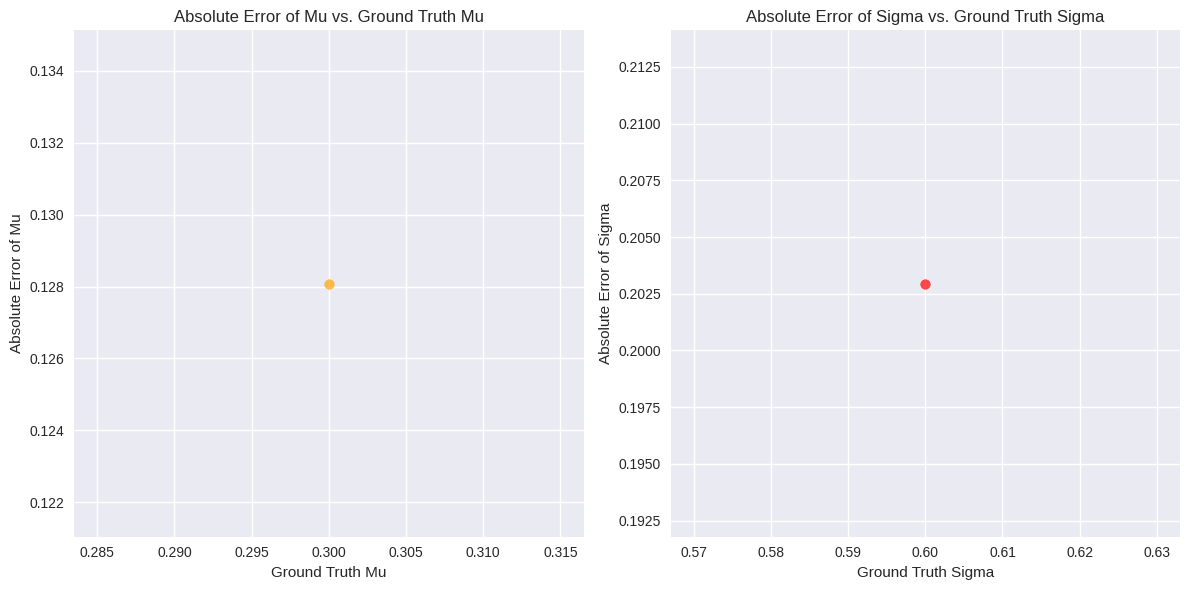

In [58]:
plt.figure(figsize=(12, 6))

# Error vs. Ground Truth Mu
plt.subplot(1, 2, 1)
plt.scatter(df['mu_gt'], df['abs_error_mu'], alpha=0.7, color='orange')
plt.title('Absolute Error of Mu vs. Ground Truth Mu')
plt.xlabel('Ground Truth Mu')
plt.ylabel('Absolute Error of Mu')

# Error vs. Ground Truth Sigma
plt.subplot(1, 2, 2)
plt.scatter(df['sigma_gt'], df['abs_error_sigma'], alpha=0.7, color='red')
plt.title('Absolute Error of Sigma vs. Ground Truth Sigma')
plt.xlabel('Ground Truth Sigma')
plt.ylabel('Absolute Error of Sigma')

plt.tight_layout()
plt.show()


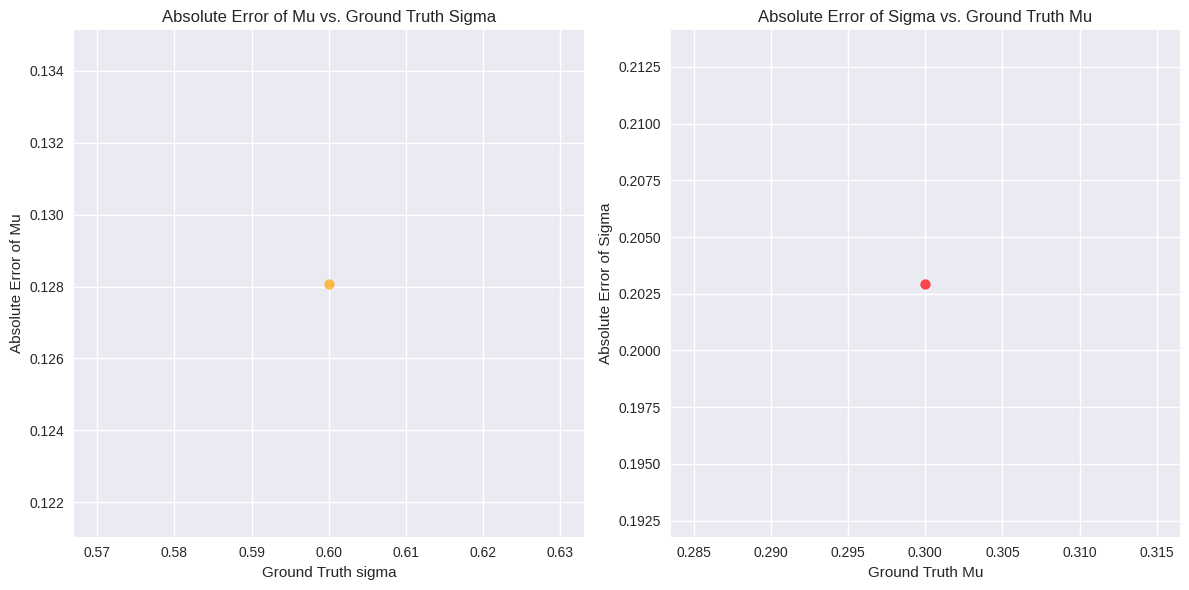

In [59]:
plt.figure(figsize=(12, 6))

# Error vs. Ground Truth Mu
plt.subplot(1, 2, 1)
plt.scatter(df['sigma_gt'], df['abs_error_mu'], alpha=0.7, color='orange')
plt.title('Absolute Error of Mu vs. Ground Truth Sigma')
plt.xlabel('Ground Truth sigma')
plt.ylabel('Absolute Error of Mu')

# Error vs. Ground Truth Sigma
plt.subplot(1, 2, 2)
plt.scatter(df['mu_gt'], df['abs_error_sigma'], alpha=0.7, color='red')
plt.title('Absolute Error of Sigma vs. Ground Truth Mu')
plt.xlabel('Ground Truth Mu')
plt.ylabel('Absolute Error of Sigma')

plt.tight_layout()
plt.show()


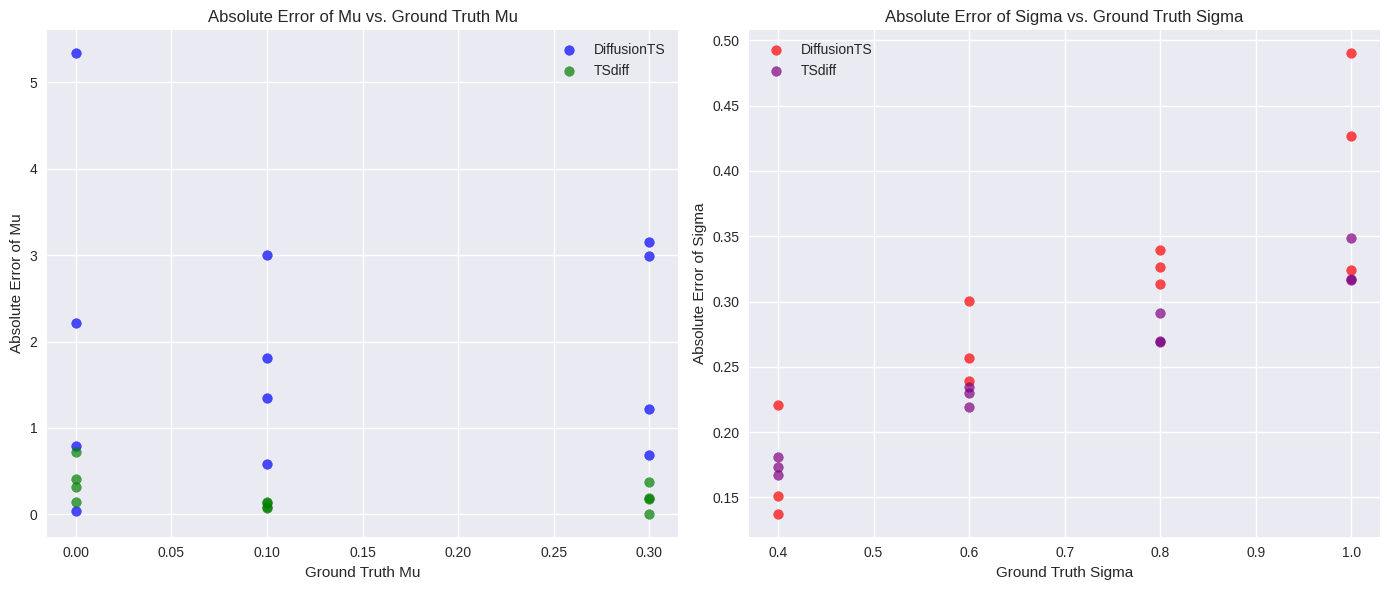

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'mu_gt': [0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3],
    'mu_est_diffusionts': [0.0331, -0.7891, -2.2186, -5.3374, -0.4819, -1.2447, -1.7087, -2.8994, -0.3814, -0.9213, -2.6931, -2.8489],
    'mu_est_tsdiff': [-0.1374, -0.3129, -0.4106, -0.716, -0.0268, 0.0167, 0.0241, -0.0443, 0.2932, 0.1068, 0.1224, -0.0769],
    'abs_error_mu_diffusionts': [0.0331, 0.7891, 2.2186, 5.3374, 0.5819, 1.3447, 1.8087, 2.9994, 0.6814, 1.2213, 2.9931, 3.1489],
    'abs_error_mu_tsdiff': [0.1374, 0.3129, 0.4106, 0.716, 0.1268, 0.0833, 0.0759, 0.1443, 0.0068, 0.1932, 0.1776, 0.3769],
    'sigma_gt': [0.4, 0.6, 0.8, 1, 0.4, 0.6, 0.8, 1, 0.4, 0.6, 0.8, 1],
    'sigma_est_diffusionts': [0.2625, 0.2999, 0.4734, 0.6755, 0.1793, 0.3429, 0.4607, 0.5099, 0.2491, 0.3611, 0.4866, 0.5734],
    'sigma_est_tsdiff': [0.2332, 0.3807, 0.5089, 0.6512, 0.2266, 0.3654, 0.5311, 0.6825, 0.2187, 0.3699, 0.5299, 0.6837],
    'abs_error_sigma_diffusionts': [0.1375, 0.3001, 0.3266, 0.3245, 0.2207, 0.2571, 0.3393, 0.4901, 0.1509, 0.2389, 0.3134, 0.4266],
    'abs_error_sigma_tsdiff': [0.1668, 0.2193, 0.2911, 0.3488, 0.1734, 0.2346, 0.2689, 0.3175, 0.1813, 0.2301, 0.2701, 0.3163]
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

# Scatter plot for abs_error_mu
plt.subplot(1, 2, 1)
plt.scatter(df['mu_gt'], df['abs_error_mu_diffusionts'], alpha=0.7, color='blue', label='DiffusionTS')
plt.scatter(df['mu_gt'], df['abs_error_mu_tsdiff'], alpha=0.7, color='green', label='TSdiff')
plt.title('Absolute Error of Mu vs. Ground Truth Mu')
plt.xlabel('Ground Truth Mu')
plt.ylabel('Absolute Error of Mu')
plt.legend()

# Scatter plot for abs_error_sigma
plt.subplot(1, 2, 2)
plt.scatter(df['sigma_gt'], df['abs_error_sigma_diffusionts'], alpha=0.7, color='red', label='DiffusionTS')
plt.scatter(df['sigma_gt'], df['abs_error_sigma_tsdiff'], alpha=0.7, color='purple', label='TSdiff')
plt.title('Absolute Error of Sigma vs. Ground Truth Sigma')
plt.xlabel('Ground Truth Sigma')
plt.ylabel('Absolute Error of Sigma')
plt.legend()

plt.tight_layout()
plt.show()



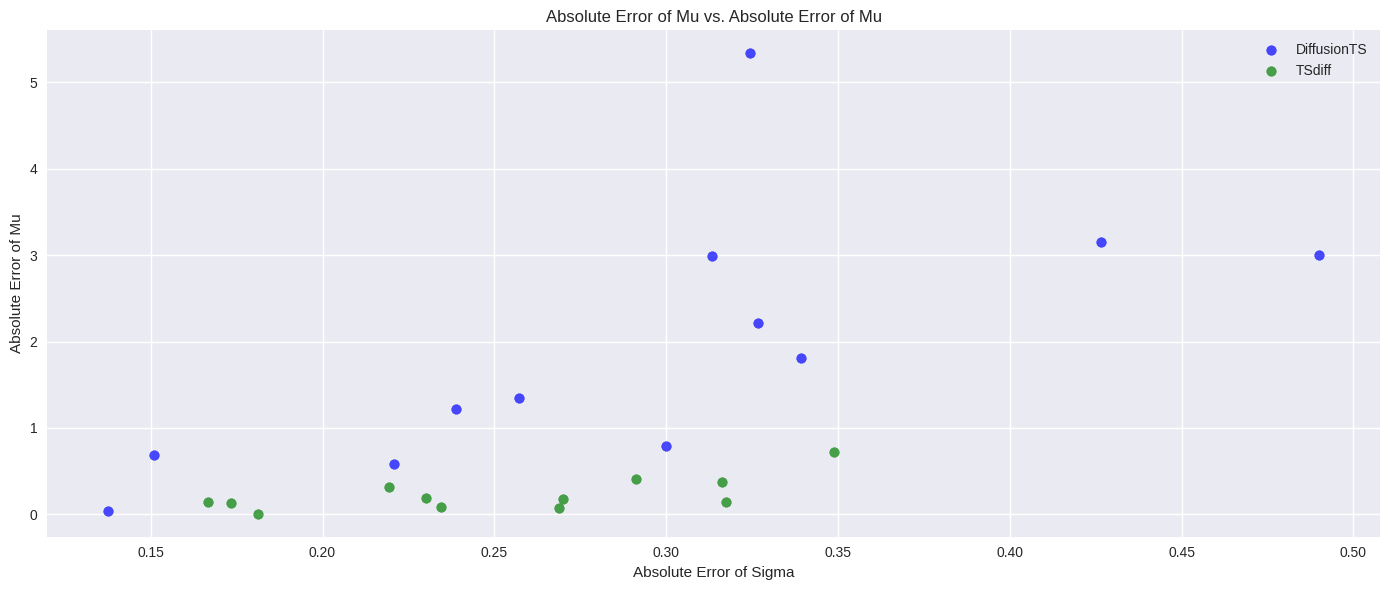

In [61]:
df = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

# Scatter plot for abs_error_mu
# plt.subplot(1, 2, 1)
plt.scatter(df['abs_error_sigma_diffusionts'], df['abs_error_mu_diffusionts'], alpha=0.7, color='blue', label='DiffusionTS')
plt.scatter(df['abs_error_sigma_tsdiff'], df['abs_error_mu_tsdiff'], alpha=0.7, color='green', label='TSdiff')
plt.title('Absolute Error of Mu vs. Absolute Error of Mu')
plt.xlabel('Absolute Error of Sigma')
plt.ylabel('Absolute Error of Mu')
plt.legend()

# # Scatter plot for abs_error_sigma
# plt.subplot(1, 2, 2)
# plt.scatter(df['abs_error_sigma_diffusionts'], df['abs_error_sigma_diffusionts'], alpha=0.7, color='red', label='DiffusionTS')
# plt.scatter(df['mu_gt'], df['abs_error_sigma_tsdiff'], alpha=0.7, color='purple', label='TSdiff')
# plt.title('Absolute Error of Sigma vs. Ground Truth Mu')
# plt.xlabel('Ground Truth Mu')
# plt.ylabel('Absolute Error of Sigma')
# plt.legend()

plt.tight_layout()
plt.show()
